In [61]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
ticker=input("Please enter a ticker ")
data=pd.DataFrame()
data[ticker]=wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

Please enter a ticker AAPL


In [62]:
log_returns=np.log(1+data.pct_change())

In [63]:
u=log_returns.mean()

In [64]:
var=log_returns.var()

In [65]:
drift=u-(0.5*var)

In [66]:
stdev=log_returns.std()

In [67]:
np.array(drift);

In [68]:
drift.values;

In [69]:
stdev.values;

In [71]:
t_intervals=1000
iterations=int(input("Enter number of iterations/paths "))

Enter number of iterations/paths 10


In [72]:
daily_returns=np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.01131715, 1.02554373, 1.01642179, ..., 0.9679718 , 1.01999874,
        0.98716957],
       [1.02519922, 1.03446011, 1.00911703, ..., 1.02372563, 1.00460918,
        1.01586536],
       [1.03716328, 0.99672528, 1.01635665, ..., 0.99513465, 0.9780241 ,
        0.98504274],
       ...,
       [1.03070744, 0.98980676, 0.98438546, ..., 1.00844509, 1.00501887,
        0.97907732],
       [1.04227551, 1.01333847, 1.02381062, ..., 0.95773333, 0.98741477,
        1.02922603],
       [0.99099461, 0.98305669, 1.00869705, ..., 1.00839899, 0.98062946,
        0.98705849]])

In [73]:
S0=data.iloc[-1]

In [74]:
price_list=np.zeros_like(daily_returns)

In [75]:
price_list[0]=S0

In [76]:
for t in range(1, t_intervals):
    price_list[t]=price_list[t-1]*daily_returns[t]

In [77]:
price_list

array([[ 130.40159607,  130.40159607,  130.40159607, ...,  130.40159607,
         130.40159607,  130.40159607],
       [ 133.68761522,  134.89524885,  131.59047169, ...,  133.4954562 ,
         131.00264101,  132.47046496],
       [ 138.65588589,  134.45350483,  133.74285162, ...,  132.84595383,
         128.12374069,  130.48906941],
       ...,
       [ 707.18952352,  327.53895162, 1299.63799857, ...,  378.44098688,
         943.01619111,  801.47340518],
       [ 737.08632247,  331.90782137, 1330.58318196, ...,  362.44554602,
         931.14811991,  824.89728788],
       [ 730.44856924,  326.28420443, 1342.15532828, ...,  365.48972133,
         913.11127466,  814.22187001]])

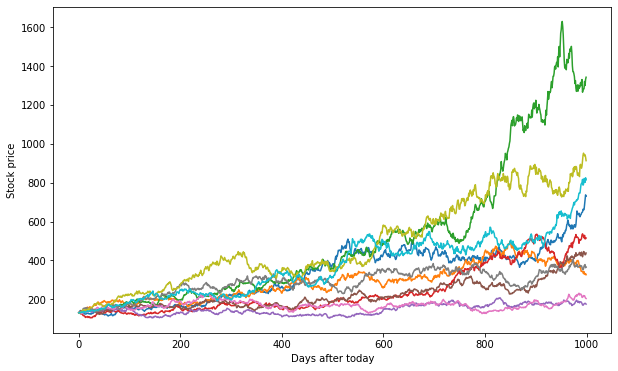

In [78]:
plt.figure(figsize=(10,6))
#possible paths of stock price
plt.xlabel("Days after today")
plt.ylabel("Stock price")
plt.plot(price_list);

In [79]:
day=int(input("Enter number of days after today "))
print("Possible prices: {}".format(price_list[day]))
print("Maximum possible price from the simulation on day {}: {}".format(day, max(price_list[day])))
print("Minumum possible price from the simulation on day {}: {}".format(day, min(price_list[day])))
print("Average price from the simulation on day {}: {}".format(day, sum(price_list[day])/len(price_list[day])))

Enter number of days after today 910
Possible prices: [ 466.12908681  408.65835834 1148.0139746   513.52640429  177.38077055
  304.44680515  168.85886571  348.67316996  851.7038018   524.9870385 ]
Maximum possible price from the simulation on day 910: 1148.01397459568
Minumum possible price from the simulation on day 910: 168.85886571298775
Average price from the simulation on day 910: 491.2378275696997
